In [1]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
import gmaps

from citipy import citipy
from datetime import datetime
from scipy import stats
from scipy.stats import linregress

from config import weather_api_key
from config import g_key

# Get the start time for computation.
start = time.time()

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80026ba215c9965e6260663fff8da556


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
print(f"There are {len(cities)} cities in the list.")

There are 630 cities in the list.


In [5]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | saint george
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | los llanos de aridane
Processing Record 5 of Set 1 | port blair
Processing Record 6 of Set 1 | cidreira
Processing Record 7 of Set 1 | tiarei
Processing Record 8 of Set 1 | cherskiy
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | geraldton
Processing Record 11 of Set 1 | kaitangata
Processing Record 12 of Set 1 | namibe
Processing Record 13 of Set 1 | victoria
Processing Record 14 of Set 1 | tommot
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | hami
Processing Record 18 of Set 1 | sharjah
Processing Record 19 of Set 1 | lunenburg
Processing Record 20 of Set 1 | kavieng
Processing Record 21 of Set 1 | kruisfontein
Processing Record 22 of Set 1 | avarua
Processing Record 23 o

City not found. Skipping...
Processing Record 38 of Set 4 | valleyview
Processing Record 39 of Set 4 | hambantota
Processing Record 40 of Set 4 | kedrovyy
Processing Record 41 of Set 4 | tiksi
Processing Record 42 of Set 4 | saint-joseph
Processing Record 43 of Set 4 | ngukurr
City not found. Skipping...
Processing Record 44 of Set 4 | severo-kurilsk
Processing Record 45 of Set 4 | maniitsoq
Processing Record 46 of Set 4 | katsuura
Processing Record 47 of Set 4 | placido de castro
Processing Record 48 of Set 4 | poum
Processing Record 49 of Set 4 | wa
City not found. Skipping...
Processing Record 50 of Set 4 | klaksvik
Processing Record 1 of Set 5 | puerto del rosario
Processing Record 2 of Set 5 | yanam
Processing Record 3 of Set 5 | yunjinghong
City not found. Skipping...
Processing Record 4 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 5 of Set 5 | arraial do cabo
Processing Record 6 of Set 5 | bataipora
Processing Record 7 of Set 5 | clyde river
Pr

Processing Record 30 of Set 8 | kangaatsiaq
Processing Record 31 of Set 8 | central point
Processing Record 32 of Set 8 | mudanjiang
Processing Record 33 of Set 8 | talnakh
Processing Record 34 of Set 8 | calatayud
Processing Record 35 of Set 8 | santa rosa
Processing Record 36 of Set 8 | adrar
Processing Record 37 of Set 8 | kuche
City not found. Skipping...
Processing Record 38 of Set 8 | trairi
Processing Record 39 of Set 8 | panguipulli
Processing Record 40 of Set 8 | chake chake
Processing Record 41 of Set 8 | moyale
Processing Record 42 of Set 8 | goundi
Processing Record 43 of Set 8 | mrirt
City not found. Skipping...
Processing Record 44 of Set 8 | iona
Processing Record 45 of Set 8 | khandbari
Processing Record 46 of Set 8 | axim
Processing Record 47 of Set 8 | moctezuma
Processing Record 48 of Set 8 | nanakuli
Processing Record 49 of Set 8 | norman wells
Processing Record 50 of Set 8 | inhambane
Processing Record 1 of Set 9 | mys shmidta
City not found. Skipping...
Processing

Processing Record 22 of Set 12 | tangzhai
Processing Record 23 of Set 12 | amalapuram
Processing Record 24 of Set 12 | inirida
Processing Record 25 of Set 12 | qaqortoq
Processing Record 26 of Set 12 | bonoua
Processing Record 27 of Set 12 | vryburg
Processing Record 28 of Set 12 | tiznit
Processing Record 29 of Set 12 | obluche
City not found. Skipping...
Processing Record 30 of Set 12 | russkaya polyana
Processing Record 31 of Set 12 | eskasem
City not found. Skipping...
Processing Record 32 of Set 12 | igarka
Processing Record 33 of Set 12 | clarence town
Processing Record 34 of Set 12 | peace river
Processing Record 35 of Set 12 | moree
Processing Record 36 of Set 12 | atar
Processing Record 37 of Set 12 | verkhoyansk
Processing Record 38 of Set 12 | pucallpa
Processing Record 39 of Set 12 | beringovskiy
Processing Record 40 of Set 12 | esperance
Processing Record 41 of Set 12 | pochutla
Processing Record 42 of Set 12 | blind river
Processing Record 43 of Set 12 | marsa matruh
Proc

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame and reorder the columns.
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ribeira Grande,PT,2022-04-07 20:05:22,38.5167,-28.7000,63.00,77,75,17.27
1,Saint George,US,2022-04-07 20:03:01,37.1041,-113.5841,74.25,9,0,5.01
2,Port Elizabeth,ZA,2022-04-07 20:06:12,-33.9180,25.5701,58.32,75,27,7.00
3,Los Llanos De Aridane,ES,2022-04-07 20:05:18,28.6585,-17.9182,60.55,79,20,12.66
4,Port Blair,IN,2022-04-07 20:05:35,11.6667,92.7500,80.04,82,100,5.14
5,Cidreira,BR,2022-04-07 20:05:05,-30.1811,-50.2056,70.92,86,100,9.57
6,Tiarei,PF,2022-04-07 20:06:02,-17.5333,-149.3333,84.22,73,1,19.71
7,Cherskiy,RU,2022-04-07 20:05:32,68.7500,161.3000,-18.42,100,86,1.36
8,Cape Town,ZA,2022-04-07 20:05:06,-33.9258,18.4232,60.28,71,0,11.99
9,Geraldton,AU,2022-04-07 20:06:12,-28.7667,114.6000,73.81,88,40,8.05


In [7]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [8]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

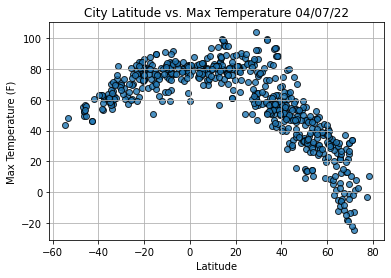

In [9]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


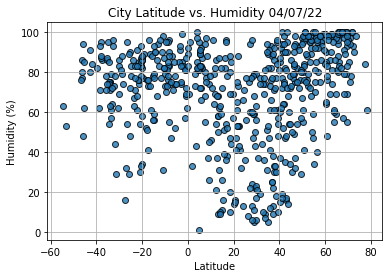

In [10]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

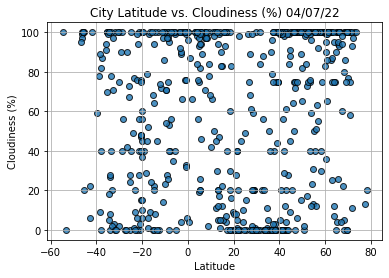

In [11]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

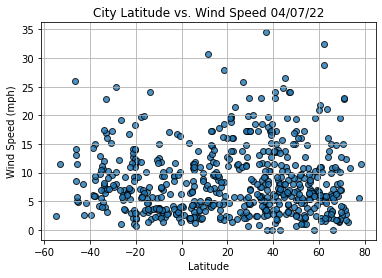

In [12]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [13]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = stats.linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(label=title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [14]:
index13 = city_data_df.loc[13]
index13

City                       Tommot
Country                        RU
Date          2022-04-07 20:07:17
Lat                       58.9564
Lng                      126.2925
Max Temp                     8.98
Humidity                       97
Cloudiness                    100
Wind Speed                   2.48
Name: 13, dtype: object

In [15]:
city_data_df["Lat"] >=0

0       True
1       True
2      False
3       True
4       True
       ...  
584    False
585     True
586     True
587     True
588    False
Name: Lat, Length: 589, dtype: bool

In [16]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ribeira Grande,PT,2022-04-07 20:05:22,38.5167,-28.7000,63.00,77,75,17.27
1,Saint George,US,2022-04-07 20:03:01,37.1041,-113.5841,74.25,9,0,5.01
3,Los Llanos De Aridane,ES,2022-04-07 20:05:18,28.6585,-17.9182,60.55,79,20,12.66
4,Port Blair,IN,2022-04-07 20:05:35,11.6667,92.7500,80.04,82,100,5.14
7,Cherskiy,RU,2022-04-07 20:05:32,68.7500,161.3000,-18.42,100,86,1.36


In [17]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

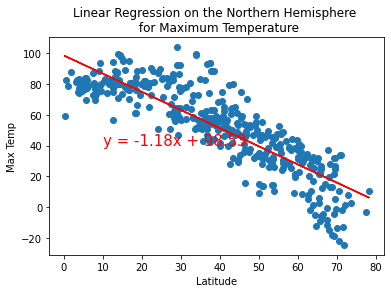

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature",
                       'Max Temp',
                       (10,40))

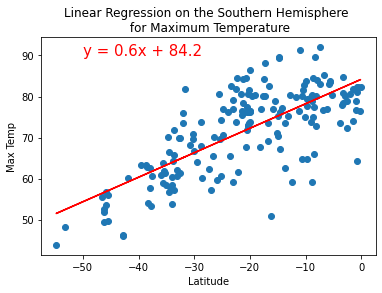

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for Maximum Temperature",
                       'Max Temp',
                       (-50,90))

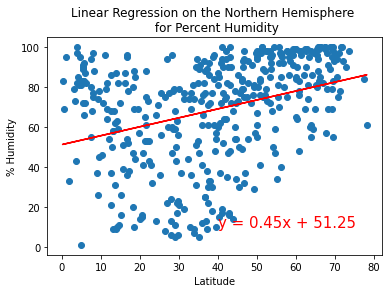

In [20]:
# Linear regression on the Northern Hemisphere for humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere \n for Percent Humidity',
                       '% Humidity',
                       (40,10))

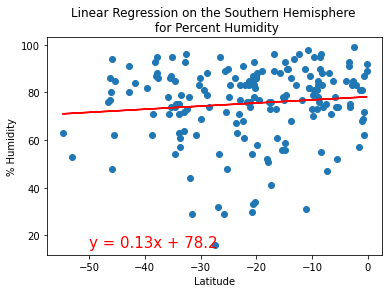

In [21]:
# Linear regression on the Southern Hemisphere for humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere \n for Percent Humidity',
                       '% Humidity',
                       (-50,15))

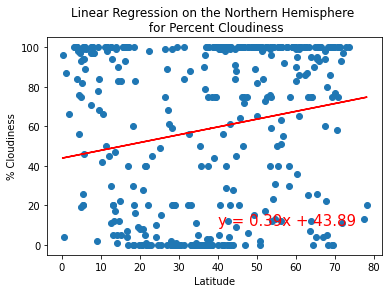

In [22]:
# Linear regression on the Northern Hemisphere for cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere \n for Percent Cloudiness',
                       '% Cloudiness',
                       (40,10))

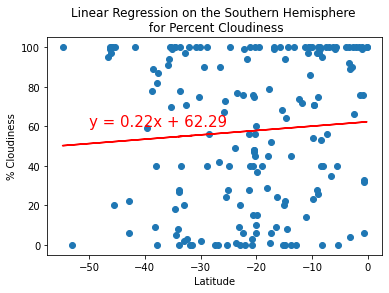

In [23]:
# Linear regression on the Southern Hemisphere for cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere \n for Percent Cloudiness',
                       '% Cloudiness',
                       (-50,60))

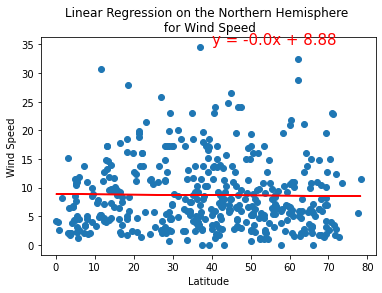

In [24]:
# Linear regression on the Northern Hemisphere for wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed',
                       'Wind Speed',
                       (40,35))

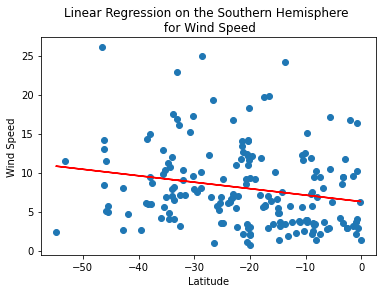

In [25]:
# Linear regression on the Southern Hemisphere for wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed',
                       'Wind Speed',
                       (-50,35))

In [26]:
# Display total computational time.
end = time.time()
total_time = end - start
seconds = total_time % 3600
minutes = seconds // 60
seconds %= 60
print(f"Total time elapsed = {minutes:.0f} minutes {seconds:.0f} seconds")

Total time elapsed = 2 minutes 36 seconds
